# Introduction to NumPy

This part of the book, along with [Part 3](03.00-Introduction-to-Pandas.ipynb), outlines techniques for effectively loading, storing, and manipulating in-memory data in Python.
The topic is very broad: datasets can come from a wide range of sources and in a wide range of formats, including collections of documents, collections of images, collections of sound clips, collections of numerical measurements, or nearly anything else.
Despite this apparent heterogeneity, many datasets can be represented fundamentally as arrays of numbers.

For example, images—particularly digital images—can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area.
Sound clips can be thought of as one-dimensional arrays of intensity versus time.
Text can be converted in various ways into numerical representations, such as binary digits representing the frequency of certain words or pairs of words.
No matter what the data is, the first step in making it analyzable will be to transform it into arrays of numbers.
(We will discuss some specific examples of this process in [Feature Engineering](05.04-Feature-Engineering.ipynb).)

For this reason, efficient storage and manipulation of numerical arrays is absolutely fundamental to the process of doing data science.
We'll now take a look at the specialized tools that Python has for handling such numerical arrays: the NumPy package and the Pandas package (discussed in [Part 3](03.00-Introduction-to-Pandas.ipynb)).

This part of the book will cover NumPy in detail. NumPy (short for *Numerical Python*) provides an efficient interface to store and operate on dense data buffers.
In some ways, NumPy arrays are like Python's built-in `list` type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size.
NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

If you followed the advice outlined in the Preface and installed the Anaconda stack, you already have NumPy installed and ready to go.
If you're more the do-it-yourself type, you can go to http://www.numpy.org/ and follow the installation instructions found there.
Once you do, you can import NumPy and double-check the version:

In [ ]:
import numpy
numpy.__version__

'1.21.2'

First 5 rows of the Iris dataset:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

Shape

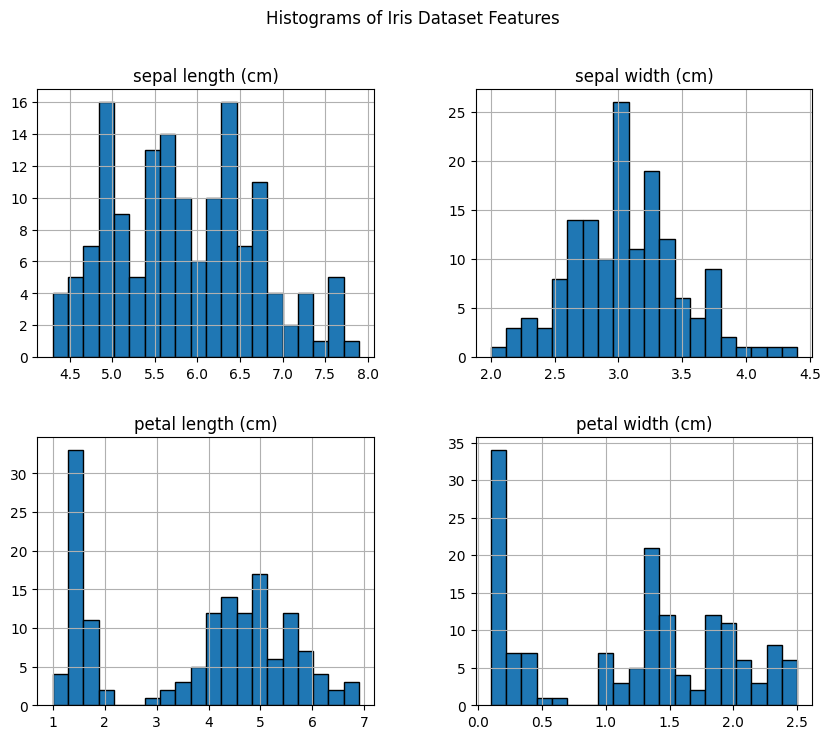


Diabetes Dataset:
     Pregnant  Glucose  Diastolic_BP  Skin_Fold  Serum_Insulin   BMI  \
0           6    148.0          72.0       35.0            NaN  33.6   
1           1     85.0          66.0       29.0            NaN  26.6   
2           8    183.0          64.0        NaN            NaN  23.3   
3           1     89.0          66.0       23.0           94.0  28.1   
4           0    137.0          40.0       35.0          168.0  43.1   
..        ...      ...           ...        ...            ...   ...   
763        10    101.0          76.0       48.0          180.0  32.9   
764         2    122.0          70.0       27.0            NaN  36.8   
765         5    121.0          72.0       23.0          112.0  26.2   
766         1    126.0          60.0        NaN            NaN  30.1   
767         1     93.0          70.0       31.0            NaN  30.4   

     Diabetes_Pedigree  Age  Class  
0                0.627   50      1  
1                0.351   31      0  
2    

<Figure size 1200x800 with 0 Axes>

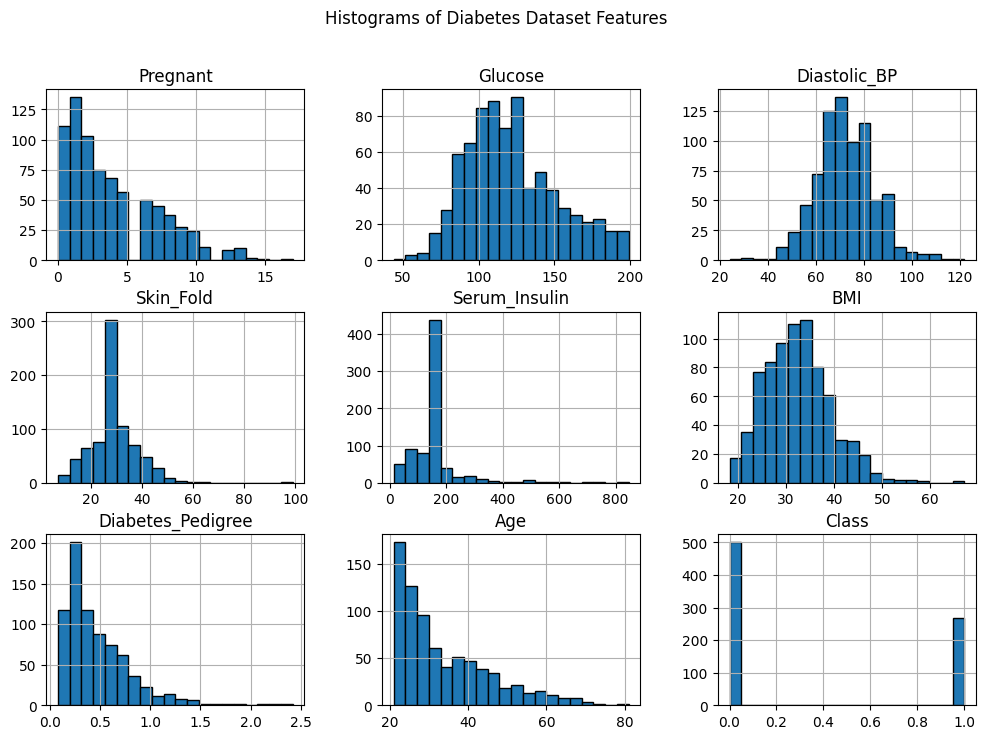


Insights:
- The histograms show the distribution of different features. Features with skewed distributions may require transformation.
- Some features may contain outliers that need further analysis.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# 1. Display the first 5 rows
print("First 5 rows of the Iris dataset:")
print(iris_df.head())

# 2. Check the shape of the dataset
print("\nShape of the dataset:", iris_df.shape)

# 3. Summary statistics
print("\nSummary statistics:")
print(iris_df.describe())

# 4. Handle missing values
print("\nMissing values in the dataset:")
print(iris_df.isnull().sum())

# 5. Compute Mean, Median, and Mode
print("\nMean:")
print(iris_df.mean())
print("\nMedian:")
print(iris_df.median())
print("\nMode:")
print(iris_df.mode().iloc[0])

# 6. Create histograms
iris_df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Iris Dataset Features")
plt.show()

# Load Diabetes Dataset
diabetes_url = "https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Diabetes%20Missing%20Data.csv"
diabetes_df = pd.read_csv(diabetes_url)

# 1. Display all data
print("\nDiabetes Dataset:")
print(diabetes_df)

# 2. Derive a problem statement
print("\nProblem Statement: Predicting diabetes based on patient attributes using machine learning techniques.")

# 3. Handle missing values
print("\nMissing values in Diabetes dataset before imputation:")
print(diabetes_df.isnull().sum())

diabetes_df.fillna(diabetes_df.mean(), inplace=True)
print("\nMissing values after imputation:")
print(diabetes_df.isnull().sum())

# 4. Compute Mean, Median, and Mode
print("\nMean:")
print(diabetes_df.mean())
print("\nMedian:")
print(diabetes_df.median())
print("\nMode:")
print(diabetes_df.mode().iloc[0])

# 5. Create histograms
plt.figure(figsize=(12, 8))
diabetes_df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Diabetes Dataset Features")
plt.show()

# 6. Explain insights from Histograms
print("\nInsights:")
print("- The histograms show the distribution of different features. Features with skewed distributions may require transformation.")
print("- Some features may contain outliers that need further analysis.")


For the pieces of the package discussed here, I'd recommend NumPy version 1.8 or later.
By convention, you'll find that most people in the SciPy/PyData world will import NumPy using `np` as an alias:

In [ ]:
import numpy as np

Throughout this chapter, and indeed the rest of the book, you'll find that this is the way we will import and use NumPy.

## Reminder About Built-in Documentation

As you read through this part of the book, don't forget that IPython gives you the ability to quickly explore the contents of a package (by using the tab completion feature), as well as the documentation of various functions (using the `?` character). For a refresher on these, refer back to [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb).

For example, to display all the contents of the NumPy namespace, you can type this:

```ipython
In [3]: np.<TAB>
```

And to display NumPy's built-in documentation, you can use this:

```ipython
In [4]: np?
```

More detailed documentation, along with tutorials and other resources, can be found at http://www.numpy.org.